Objective: Determine if a credit line should be extended to LoanTap customer and what should the repayment terms be in business recommendations?



In [1]:
!pip install category_encoders

In [2]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/logistic_regression.csv")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
#shape
df.shape

(396030, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
# numerical columns
num_col = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec',
           'revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

In [11]:
#categorical columns
cat_col = [ 'term', 'grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d','purpose', 'title',
       'earliest_cr_line','initial_list_status', 'application_type','address']

In [12]:
num_col_df = df[num_col]
num_col_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [13]:
cat_col_df = df[cat_col]
cat_col_df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [14]:
cat_col_df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
OMIV Supervisor,1
"SVP, Technology",1
sikorsky,1


In [15]:
cat_col_df['term'].value_counts()

,count
term,
36 months,302005
60 months,94025


There is 36 month and 60 month  terms

In [16]:
cat_col_df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


There are 6 grades to categorise

In [17]:
cat_col_df['sub_grade'].value_counts()

,count
sub_grade,
B3,26655
B4,25601
C1,23662
C2,22580
B2,22495
B5,22085
C3,21221
C4,20280
B1,19182


In [18]:
cat_col_df['emp_length'].value_counts()


,count
emp_length,
10+ years,126041
2 years,35827
< 1 year,31725
3 years,31665
5 years,26495
1 year,25882
4 years,23952
6 years,20841
7 years,20819


In [19]:
cat_col_df['home_ownership'].value_counts()


,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


There are 6 types of home ownership

In [20]:
cat_col_df['verification_status'].value_counts()


,count
verification_status,
Verified,139563
Source Verified,131385
Not Verified,125082


There are 3 verification status

In [21]:
cat_col_df['purpose'].value_counts()

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790
small_business,5701
car,4697
medical,4196
moving,2854


In [22]:
cat_col_df['title'].value_counts()

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
...,...
creditcardrefi,1
Debt/Home,1
Peace Of Mind Loan,1


In [23]:
cat_col_df['initial_list_status'].value_counts()


,count
initial_list_status,
f,238066
w,157964


In [24]:
cat_col_df['application_type'].value_counts()


,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


In [25]:
cat_col_df['issue_d'].value_counts()


,count
issue_d,
Oct-2014,14846
Jul-2014,12609
Jan-2015,11705
Dec-2013,10618
Nov-2013,10496
...,...
Aug-2007,26
Sep-2008,25
Nov-2007,22


In [26]:
cat_col_df['earliest_cr_line'].value_counts()


,count
earliest_cr_line,
Oct-2000,3017
Aug-2000,2935
Oct-2001,2896
Aug-2001,2884
Nov-2000,2736
...,...
Feb-1957,1
Nov-1950,1
May-1955,1


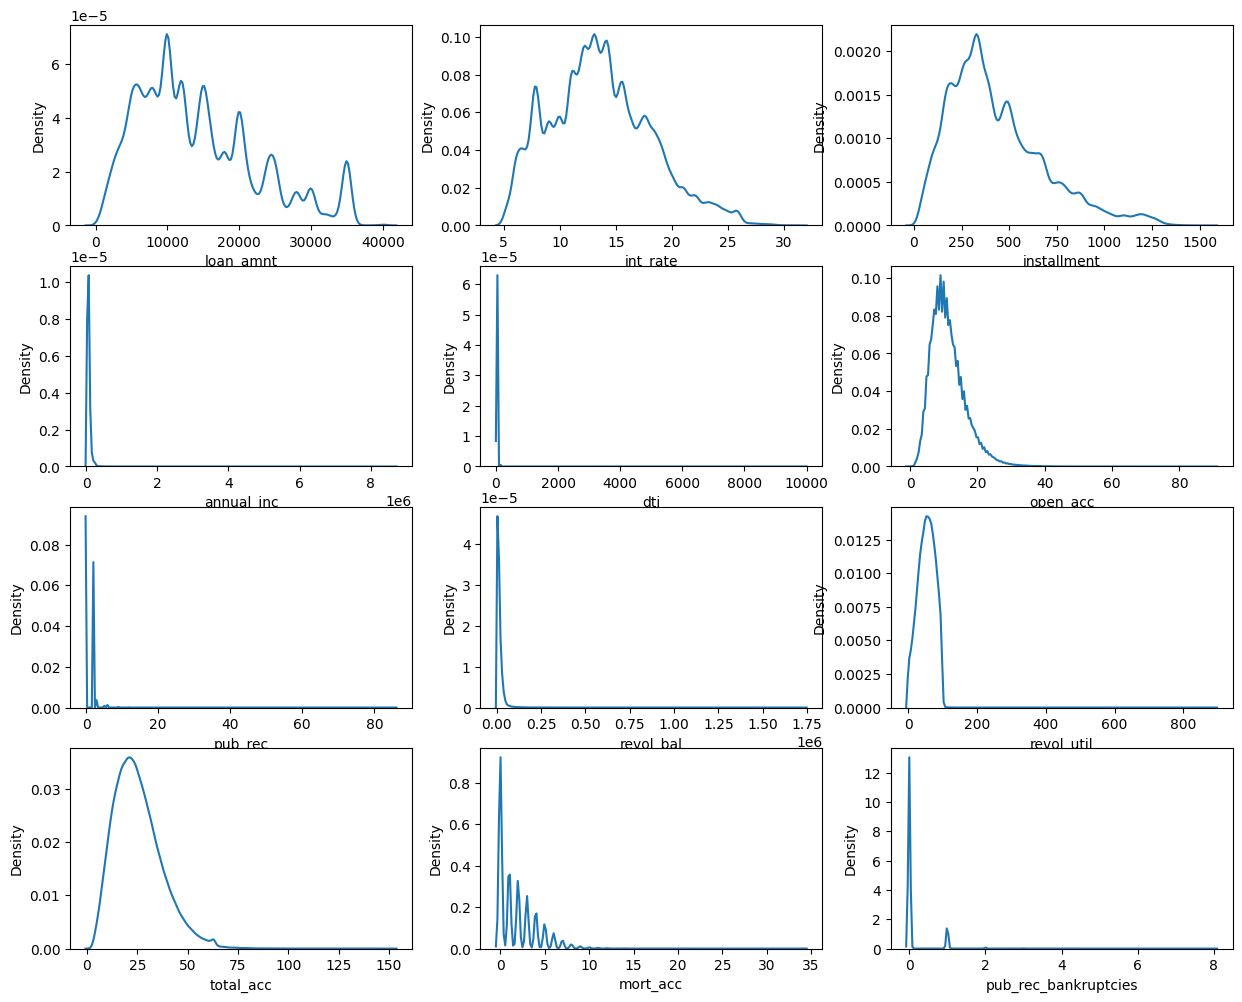

In [27]:
cols = num_col_df.columns[:12]
fig, axes = plt.subplots(nrows=4, ncols = 3, figsize = (15,12))
axes = axes.flatten()
for i, col in enumerate(cols):
  sns.kdeplot(df[col], ax = axes[i])

From the above graphs we can predict that loan amount of 10000 is quite common with inital rate of 15% with around 350 installments.

<Axes: xlabel='initial_list_status', ylabel='count'>

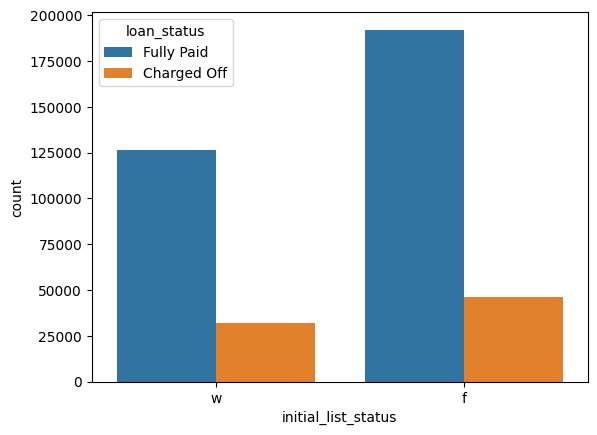

In [28]:
sns.countplot(data = df, x = 'initial_list_status', hue = 'loan_status')

For f status fukky paid and charged off are higher compared to w

<Axes: >

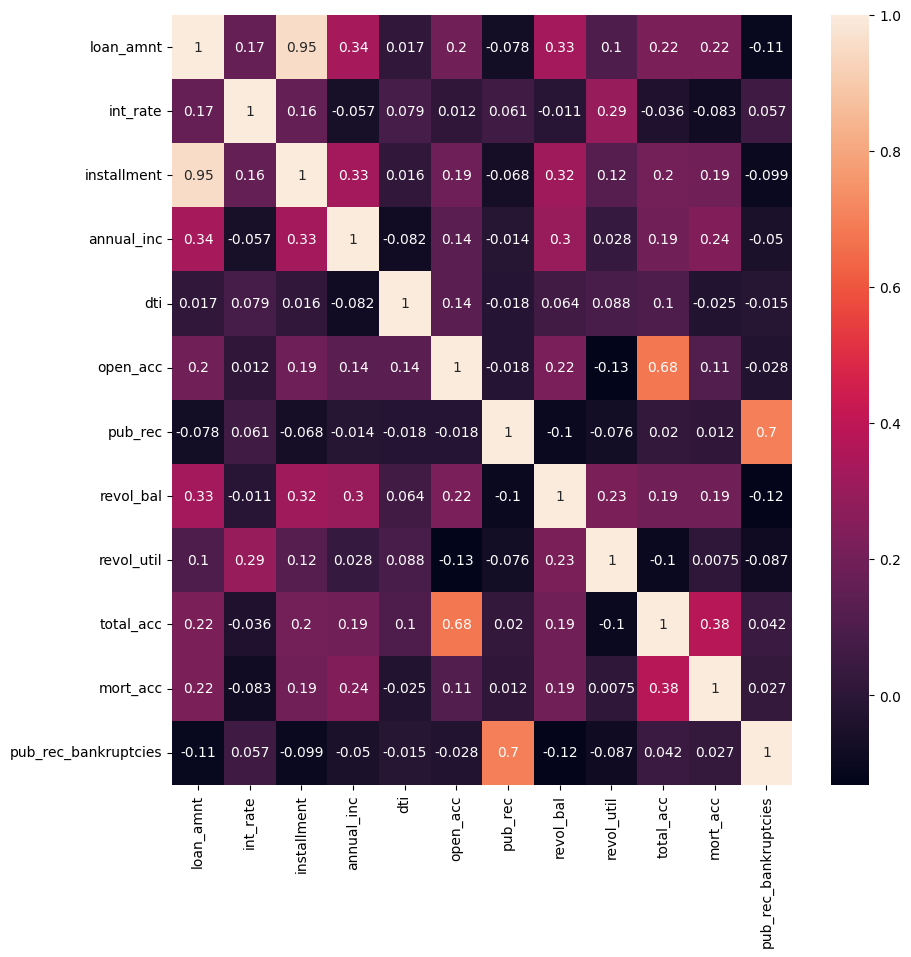

In [29]:
plt.figure(figsize=(10,10))
corr = num_col_df.corr()
sns.heatmap(data = corr, annot = True)

Installment and loan_amt showed high correlation. Total_acc and open_acc, pub_rec and pub_rec_bankruptcies has also showed significant correlation.
It also observed, almost all the variable are negatively correlated with pub_rec_bankruptcies except pub_rec, total_acc and mort_acc.

**Exploratory data Analysis**

In [30]:
#replacing null values with most occuring values
col = ['emp_title', 'emp_length', 'title']
for i in col:
  df[i].fillna(df[i].mode()[0], inplace = True)


/tmp/ipython-input-1974726435.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace = True)


In [31]:
#replacing null values with mean
mean_col = ['mort_acc', 'pub_rec_bankruptcies', 'revol_util']
for i in mean_col:
  df[i].fillna(df[i].mean(), inplace = True)


/tmp/ipython-input-191050707.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


In [32]:
df['emp_length'] = np.where(df['emp_length'] == '10+ years', 1, 0)

In [33]:
#droppinf positively correlated variable
df.drop(['installment', 'open_acc', 'pub_rec_bankruptcies'], axis = 1, inplace = True)

In [34]:
df['term'] = df.term.str.replace(' months','').astype(int)


In [35]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['i_month'] = df['issue_d'].dt.month
df['i_year'] = df['issue_d'].dt.year

/tmp/ipython-input-127752955.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['grade']= label_encoder.fit_transform(df['grade'])
df['grade'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [37]:
df.drop(['address', 'issue_d', 'earliest_cr_line', 'title', 'emp_title', 'sub_grade'], axis = 1, inplace = True)

In [38]:
df.drop([ 'issue_d', 'earliest_cr_line', 'title', 'emp_title', 'sub_grade'], axis = 1, inplace = True)

KeyError: "['issue_d', 'earliest_cr_line', 'title', 'emp_title', 'sub_grade'] not found in axis"

In [40]:
df['verification_status'] = df['verification_status'].map({
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
})

In [41]:
df['verification_status'].value_counts()

,count
verification_status,
1,139563
2,131385
0,125082


In [42]:
df['loan_status'] = np.where(df['loan_status'] == 'Fully Paid', 1, 0)

In [43]:
df['initial_list_status'] = np.where(df['initial_list_status'] == 'w', 1, 0)

In [44]:
X = df.drop(['loan_status'], axis = 1)
y = df['loan_status']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=True, test_size=0.2)


In [46]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['application_type', 'home_ownership', 'purpose'])
encoder.fit_transform(X_train, y_train)

X_train_en = encoder.transform(X_train)
X_test_en = encoder.transform(X_test)

In [47]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,i_month,i_year
0,10000.0,36,11.44,1,1,RENT,117000.0,0,1,vacation,26.24,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,1,2015
1,8000.0,36,11.99,1,0,MORTGAGE,65000.0,0,1,debt_consolidation,22.05,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,1,2015
2,15600.0,36,10.49,1,0,RENT,43057.0,2,1,credit_card,12.79,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,1,2015
3,7200.0,36,6.49,0,0,RENT,54000.0,0,1,credit_card,2.60,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,11,2014
4,24375.0,60,17.27,2,0,MORTGAGE,55000.0,1,0,credit_card,33.95,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,4,2013


In [48]:
X_train.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
purpose,0
dti,0


**Fitting a model**

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_en)
x_test = scaler.transform(X_test_en)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
model.coef_

array([[-0.06726394, -0.18482415, -0.08729532, -0.36739193, -0.01362954,
         0.11751983,  0.18606623, -0.05798567,  0.05564066, -0.48427756,
        -0.03451088,  0.04006725, -0.07638015,  0.03207739,  0.0203979 ,
        -0.00440533,  0.08643415,  0.02979068, -0.07155256]])

In [54]:
model.intercept_

array([1.57660704])

In [55]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8039542458904628

In [56]:
model=LogisticRegression(C=1/60)
model.fit(X_train,y_train)

LogisticRegression(C=0.016666666666666666)

In [57]:
model.coef_

array([[-0.06703357, -0.1847625 , -0.09092381, -0.36379144, -0.01359819,
         0.11736987,  0.18614713, -0.05800304,  0.05562389, -0.48003865,
        -0.03439307,  0.03965719, -0.07646849,  0.03158112,  0.02027951,
        -0.00428618,  0.08658996,  0.02970228, -0.07192456]])

In [58]:
model.intercept_

array([1.57626032])

In [62]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [68]:
accuracy(y_test, model.predict(x_test))

np.float64(0.8039037446658082)

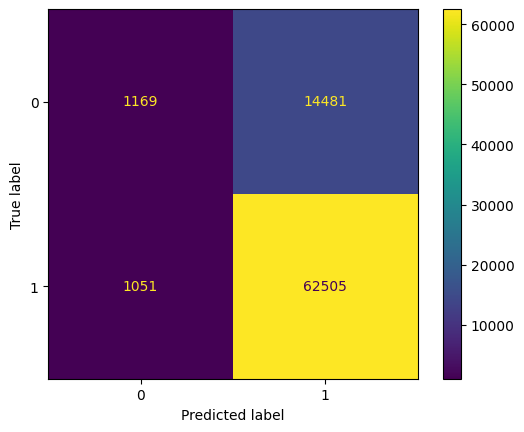

In [69]:
#confusion matrix
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
conf = confusion_matrix(y_test, model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=model.classes_)
disp.plot()

In [70]:
#sensitivity
sensitivity = 62505/(1051+62505)
sensitivity

0.9834634023538297

In [71]:
#Precision
from sklearn.metrics import precision_score, f1_score
print(precision_score(y_test, y_pred))
print(f1_score(y_test,y_pred))

0.8119754722373789
0.8895040204938447


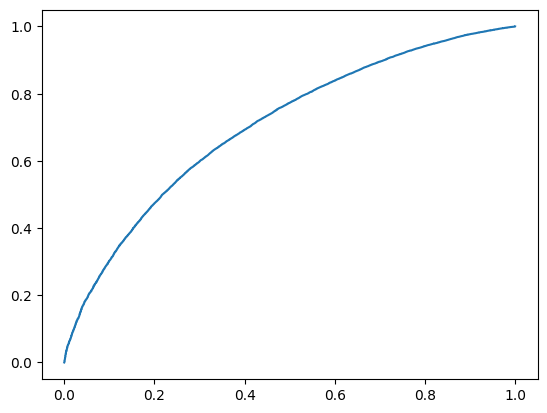

In [72]:
from sklearn.metrics import roc_curve
prob = model.predict_proba(x_test)
probabilities  = prob[:,1]
fpr,tpr,thres = roc_curve(y_test, probabilities)
plt.plot(fpr,tpr)

Insight: Customer tends to opt 10 years of loan with interest rate of 15%

Recommendtions: Based on the analysis, LoanTap should prioritize improving the performance of lower-grade loans. G-grade loans show only about a 55% repayment probability, meaning every second loan is likely to be charged off. Strengthening screening and monitoring in this segment will help reduce losses.

Additionally, borrowers carrying high-interest loans have nearly a 40% chance of default, indicating a strong link between heavy interest burden and repayment risk. LoanTap should closely track such borrowers and refine risk-based pricing strategies to avoid over-leveraging customers.

The data also shows that low-interest loans have repayment rates above 90%, making them the most reliable segment. LoanTap should actively promote and scale these products as they demonstrate the healthiest performance.

Joint loans stand out as well, with the highest full-payment probability across all categories. Encouraging joint applications could further strengthen portfolio quality.

Finally, applicants with a high number of public derogatory records exhibit elevated default risk. LoanTap should exercise caution and avoid lending to such users unless additional risk-mitigation checks are in place.